In [20]:
import pandas as pd
from pathlib import Path

data_dir = Path.home() / "Documents" / "immigration-project" / "data"

# Load both halves of the ACS dataset
pusa = pd.read_csv(data_dir / "psam_pusa.csv")
pusb = pd.read_csv(data_dir / "psam_pusb.csv")

df = pd.concat([pusa, pusb], ignore_index=True)

keep = ["ST","PUMA","AGEP","SEX","SCHL","NATIVITY","CIT","ENG","ESR","WAGP","RAC1P","HISP"]
keep = [c for c in keep if c in df.columns]
df = df[keep]

df.head()


,PUMA,AGEP,SEX,SCHL,NATIVITY,CIT,ENG,ESR,WAGP,RAC1P,HISP
0,2802,86,2,16.0,1,1,NaN,6.0,0.0,2,1
1,100,60,1,16.0,1,1,NaN,6.0,0.0,1,1
2,402,20,1,19.0,1,1,NaN,6.0,0.0,1,1
3,2702,13,2,11.0,1,1,NaN,NaN,NaN,2,1
4,2802,18,1,18.0,1,1,NaN,6.0,2500.0,1,1


In [21]:
# Keep only immigrants (foreign-born individuals)
imm = df[df["NATIVITY"] == 2].copy()

# Check how many rows we have
print("Immigrant rows:", len(imm))

# Make a smaller random sample (up to 100,000 rows) for quicker testing
sample = imm.sample(min(100_000, len(imm)), random_state=42)

# Save both to your Desktop
imm.to_csv(Path.home() / "Desktop" / "acs2023_immigrants_full.csv", index=False)
sample.to_csv(Path.home() / "Desktop" / "acs2023_immigrants_100k.csv", index=False)

print("\nSaved files:")
print("→ ~/Desktop/acs2023_immigrants_full.csv")
print("→ ~/Desktop/acs2023_immigrants_100k.csv")


Immigrant rows: 425320

Saved files:
→ ~/Desktop/acs2023_immigrants_full.csv
→ ~/Desktop/acs2023_immigrants_100k.csv


In [22]:
# Quick look at what our immigrant dataset looks like
print("Shape (rows, columns):", df.shape)
print("\nColumn names:\n", df.columns.tolist())

# Preview a few rows
df.head()

# Basic stats for numeric columns
df.describe()


Shape (rows, columns): (3405809, 11)

Column names:
 ['PUMA', 'AGEP', 'SEX', 'SCHL', 'NATIVITY', 'CIT', 'ENG', 'ESR', 'WAGP', 'RAC1P', 'HISP']


,PUMA,AGEP,SEX,SCHL,NATIVITY,CIT,ENG,ESR,WAGP,RAC1P,HISP
count,3.405809e+06,3.405809e+06,3.405809e+06,3.315431e+06,3.405809e+06,3.405809e+06,625353.000000,2.847645e+06,2.888432e+06,3.405809e+06,3.405809e+06
mean,4.887823e+03,4.311174e+01,1.509099e+00,1.645650e+01,1.124881e+00,1.454549e+00,1.615016,3.146978e+00,3.671115e+04,2.734650e+00,1.748121e+00
std,8.443919e+03,2.397471e+01,4.999173e-01,5.579060e+00,3.305837e-01,1.158888e+00,0.906960,2.431131e+00,6.772915e+04,2.958913e+00,3.187854e+00
min,1.000000e+02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+03,2.200000e+01,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,2.312000e+03,4.400000e+01,2.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,8.800000e+03,1.000000e+00,1.000000e+00
75%,4.801000e+03,6.300000e+01,2.000000e+00,2.100000e+01,1.000000e+00,1.000000e+00,2.000000,6.000000e+00,5.000000e+04,2.000000e+00,1.000000e+00
max,8.100300e+04,9.600000e+01,2.000000e+00,2.400000e+01,2.000000e+00,5.000000e+00,4.000000,6.000000e+00,8.700000e+05,9.000000e+00,2.400000e+01


In [23]:
# Copy dataframe so we don't overwrite original
clean = df.copy()

# Label dictionaries
sex_map = {1: "Male", 2: "Female"}
cit_map = {
    1: "Born in the U.S.",
    2: "Born in U.S. territories",
    3: "Born abroad of American parents",
    4: "Naturalized citizen",
    5: "Not a citizen"
}
eng_map = {
    1: "Speaks only English",
    2: "Very well",
    3: "Well",
    4: "Not well",
    5: "Not at all"
}
esr_map = {
    1: "Employed at work",
    2: "Employed absent",
    3: "Unemployed",
    4: "Armed forces at work",
    5: "Armed forces absent",
    6: "Not in labor force"
}

# Apply mappings
clean["SEX_LABEL"] = clean["SEX"].map(sex_map)
clean["CIT_LABEL"] = clean["CIT"].map(cit_map)
clean["ENG_LABEL"] = clean["ENG"].map(eng_map)
clean["ESR_LABEL"] = clean["ESR"].map(esr_map)

# Check a few rows
clean[["SEX", "SEX_LABEL", "CIT_LABEL", "ENG_LABEL", "ESR_LABEL"]].head(10)


,SEX,SEX_LABEL,CIT_LABEL,ENG_LABEL,ESR_LABEL
0,2,Female,Born in the U.S.,NaN,Not in labor force
1,1,Male,Born in the U.S.,NaN,Not in labor force
2,1,Male,Born in the U.S.,NaN,Not in labor force
3,2,Female,Born in the U.S.,NaN,NaN
4,1,Male,Born in the U.S.,NaN,Not in labor force
5,1,Male,Born in the U.S.,NaN,Not in labor force
6,1,Male,Born in the U.S.,NaN,Not in labor force
7,1,Male,Born in the U.S.,NaN,Not in labor force
8,2,Female,Born in the U.S.,NaN,Not in labor force
9,2,Female,Born in the U.S.,NaN,Employed at work


In [24]:
# Check how many missing values there are in each column
clean[["CIT", "ENG", "ESR"]].isna().sum()


CIT          0
ENG    2780456
ESR     558164
dtype: int64

In [25]:
# Keep only immigrants (foreign-born) and working-age adults
immigrants = clean[
    (clean["NATIVITY"] == 2) &  # foreign-born
    (clean["AGEP"].between(18, 64))
].copy()

print("Filtered rows:", len(immigrants))
immigrants[["AGEP", "CIT_LABEL", "ENG_LABEL", "ESR_LABEL"]].head(10)


Filtered rows: 311381


,AGEP,CIT_LABEL,ENG_LABEL,ESR_LABEL
17,45,Not a citizen,NaN,Not in labor force
55,24,Not a citizen,NaN,Not in labor force
99,53,Naturalized citizen,Very well,Not in labor force
167,37,Not a citizen,Very well,Not in labor force
208,24,Not a citizen,NaN,Not in labor force
238,20,Naturalized citizen,NaN,Not in labor force
344,42,Naturalized citizen,NaN,Not in labor force
375,19,Not a citizen,NaN,Not in labor force
409,19,Not a citizen,NaN,Not in labor force
421,42,Naturalized citizen,NaN,Not in labor force


In [26]:
# Save cleaned immigrant dataset
immigrants.to_csv("~/Desktop/acs2023_immigrants_clean.csv", index=False)

print("✅ Saved cleaned dataset to Desktop as 'acs2023_immigrants_clean.csv'")


✅ Saved cleaned dataset to Desktop as 'acs2023_immigrants_clean.csv'


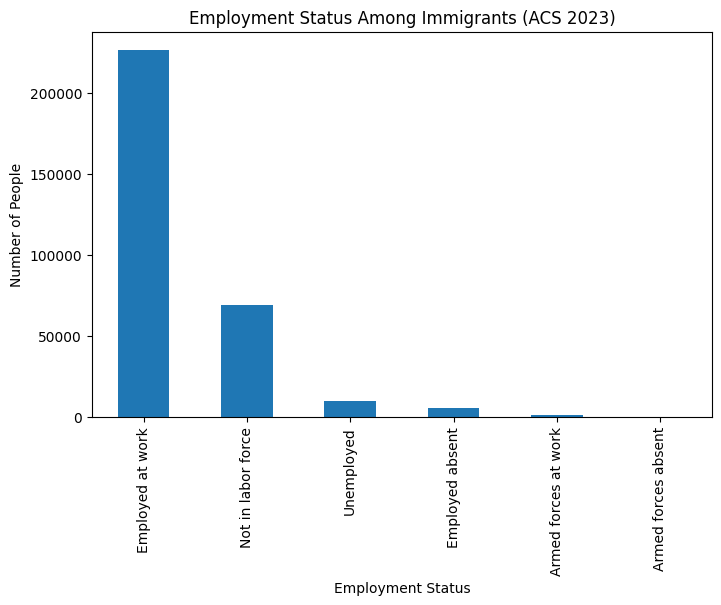

In [27]:
import matplotlib.pyplot as plt

# Count of each employment status
immigrants["ESR_LABEL"].value_counts().plot(
    kind="bar",
    figsize=(8, 5),
    title="Employment Status Among Immigrants (ACS 2023)",
    ylabel="Number of People",
    xlabel="Employment Status"
)
plt.show()


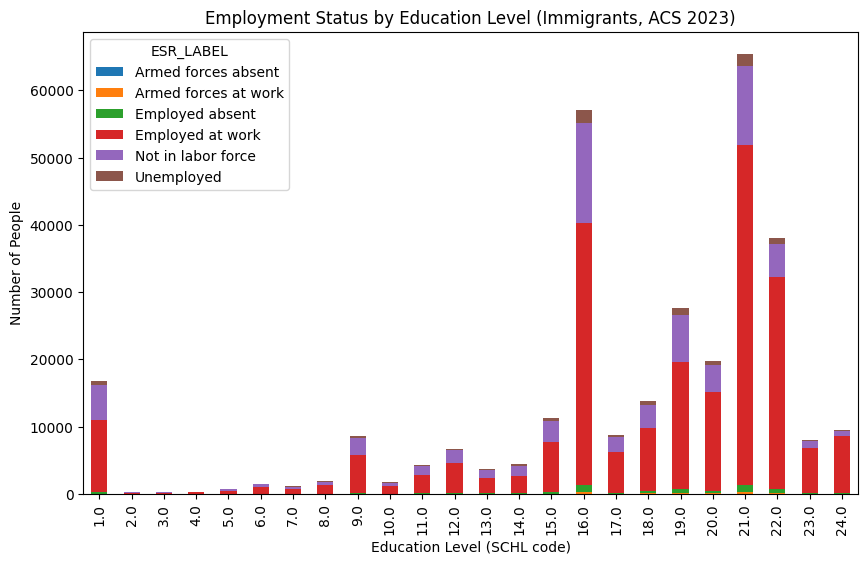

In [28]:
# Compare education vs employment
edu_vs_emp = immigrants.groupby(["SCHL", "ESR_LABEL"]).size().unstack(fill_value=0)

edu_vs_emp.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Employment Status by Education Level (Immigrants, ACS 2023)")
plt.xlabel("Education Level (SCHL code)")
plt.ylabel("Number of People")
plt.show()


In [29]:
# Education level mapping (SCHL: Educational Attainment)
schl_map = {
    1: "No schooling completed",
    2: "Nursery to 4th grade",
    3: "5th or 6th grade",
    4: "7th or 8th grade",
    5: "9th grade",
    6: "10th grade",
    7: "11th grade",
    8: "12th grade, no diploma",
    9: "High school graduate or GED",
    10: "Some college, less than 1 year",
    11: "Some college, 1 or more years, no degree",
    12: "Associate’s degree",
    13: "Bachelor’s degree",
    14: "Master’s degree",
    15: "Professional degree (e.g., JD, MD)",
    16: "Doctorate degree",
    17: "Graduate or professional degree beyond doctorate",
    18: "Unknown / Missing",
    19: "GED or alternative credential",
    20: "College credit, no degree",
    21: "Vocational/technical certificate",
    22: "Advanced college diploma",
    23: "Post-master's certificate",
    24: "Other"
}

# Apply to dataset
immigrants["SCHL_LABEL"] = immigrants["SCHL"].map(schl_map)

# Verify a few rows
immigrants[["SCHL", "SCHL_LABEL"]].head(10)


,SCHL,SCHL_LABEL
17,17.0,Graduate or professional degree beyond doctorate
55,19.0,GED or alternative credential
99,13.0,Bachelor’s degree
167,19.0,GED or alternative credential
208,19.0,GED or alternative credential
238,16.0,Doctorate degree
344,11.0,"Some college, 1 or more years, no degree"
375,19.0,GED or alternative credential
409,19.0,GED or alternative credential
421,11.0,"Some college, 1 or more years, no degree"


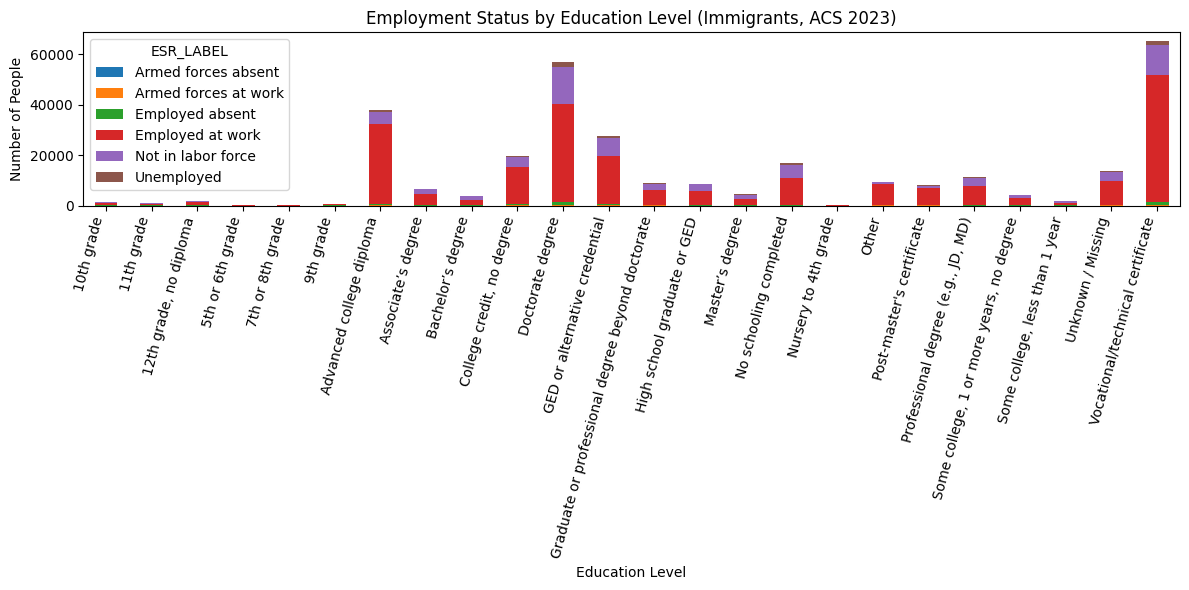

In [30]:
# Group by education label and employment status
edu_vs_emp_labeled = immigrants.groupby(["SCHL_LABEL", "ESR_LABEL"]).size().unstack(fill_value=0)

# Plot
edu_vs_emp_labeled.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Employment Status by Education Level (Immigrants, ACS 2023)")
plt.xlabel("Education Level")
plt.ylabel("Number of People")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


In [31]:
# Create a summary table: employment rate by education level
summary = immigrants.groupby("SCHL_LABEL")["ESR_LABEL"].value_counts(normalize=True).unstack(fill_value=0) * 100

# Keep only relevant columns (we’ll focus on working and unemployed)
summary = summary[["Employed at work", "Unemployed", "Not in labor force"]]

# Round and sort by education
summary = summary.round(1).sort_index()

# Display the table
summary.head(15)


ESR_LABEL,Employed at work,Unemployed,Not in labor force
SCHL_LABEL,,,
10th grade,63.9,3.0,31.7
11th grade,62.9,3.3,32.2
"12th grade, no diploma",67.5,3.4,27.2
5th or 6th grade,59.5,4.7,33.0
7th or 8th grade,62.7,2.9,32.9
9th grade,64.9,3.0,30.4
Advanced college diploma,83.1,2.4,12.8
Associate’s degree,66.6,3.2,28.3
Bachelor’s degree,61.2,3.6,33.8


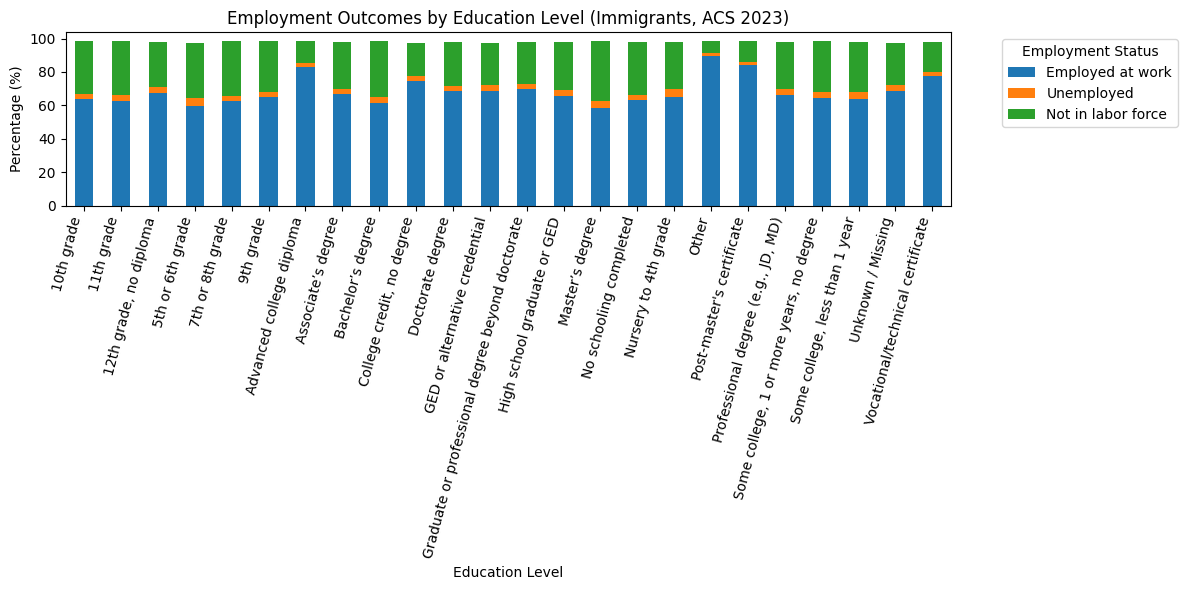

In [32]:
# Plot employment, unemployment, and non-labor-force percentages
summary.plot(
    kind="bar",
    figsize=(12, 6),
    stacked=True,
    title="Employment Outcomes by Education Level (Immigrants, ACS 2023)",
    xlabel="Education Level",
    ylabel="Percentage (%)"
)

plt.xticks(rotation=75, ha="right")
plt.legend(title="Employment Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# Load your dataset
df = pd.read_csv("acs2023_immigrants_clean.csv")

# Empty dictionary to store summaries
profile = {}

# Loop through every column
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        # Numeric columns → compute summary stats
        profile[col] = {
            "Type": "Numeric",
            "Missing %": round(df[col].isna().mean() * 100, 2),
            "Mean": round(df[col].mean(), 2),
            "Median": round(df[col].median(), 2),
            "Std": round(df[col].std(), 2),
            "Min": df[col].min(),
            "Max": df[col].max()
        }
    else:
        # Categorical columns → summarize frequency
        profile[col] = {
            "Type": "Categorical",
            "Missing %": round(df[col].isna().mean() * 100, 2),
            "Unique Values": df[col].nunique(),
            "Top 5 Values": df[col].value_counts(normalize=True).head(5).to_dict()
        }

# Convert results to DataFrame for easy viewing
profile_df = pd.DataFrame(profile).T
print(profile_df)


                  Type Missing %     Mean   Median       Std  Min       Max  \
PUMA           Numeric       0.0  5406.61   3716.0   7656.82  100     81003   
AGEP           Numeric       0.0    43.76     45.0     12.31   18        64   
SEX            Numeric       0.0     1.52      2.0       0.5    1         2   
SCHL           Numeric       0.0    17.37     19.0      5.43  1.0      24.0   
NATIVITY       Numeric       0.0      2.0      2.0       0.0    2         2   
CIT            Numeric       0.0     4.48      4.0       0.5    4         5   
ENG            Numeric      16.4     1.86      2.0      0.99  1.0       4.0   
ESR            Numeric       0.0      2.2      1.0      2.07  1.0       6.0   
WAGP           Numeric       0.0  52653.5  30000.0  81941.85  0.0  870000.0   
RAC1P          Numeric       0.0      5.7      6.0      2.95    1         9   
HISP           Numeric       0.0      3.3      1.0      4.97    1        24   
SEX_LABEL  Categorical       0.0      NaN      NaN  